In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
steam_data = pd.read_csv("games_data.csv", encoding="latin-1")

C:\Users\xxrai\AppData\Local\Temp\ipykernel_15208\852749620.py:1: DtypeWarning: Columns (10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  steam_data = pd.read_csv("games_data.csv", encoding="latin-1")


# Análisis del Dataset de Videojuegos en Steam  

## Introducción  
Steam es la plataforma de distribución digital líder para videojuegos de PC, desarrollada por Valve Corporation. Desde su lanzamiento en 2003, ha transformado la manera en que los usuarios acceden, compran y gestionan videojuegos, consolidándose como un espacio clave tanto para grandes estudios como para desarrolladores independientes. Además de facilitar la adquisición y actualización de títulos, Steam fomenta comunidades activas y ofrece herramientas sociales que enriquecen la experiencia de los jugadores. Su impacto en la industria es innegable, ya que ha democratizado el acceso a una amplia variedad de juegos y ha impulsado la innovación en el sector.

En este informe, analizaremos un conjunto de datos extraído de [Kaggle](https://www.kaggle.com/datasets/rahuldabholkar/steam-pc-games), que recopila información relevante sobre videojuegos disponibles en Steam para PC. El objetivo es comprender la estructura del dataset, clasificar sus variables y sentar las bases para un análisis estadístico que permita identificar tendencias y patrones en el mercado de videojuegos digital.

---

## Descripción del Dataset  

El dataset contiene información detallada de miles de videojuegos publicados en Steam. Cada fila representa un juego y cada columna corresponde a una característica específica. Para facilitar el análisis y la interpretación, clasificamos las variables según su naturaleza y utilidad, pensando en quienes se inician en el análisis de datos:

### 🔹 Identificadoras  
- **ID (número de fila):**  
  - Es un identificador único para cada registro, útil para distinguir cada juego, pero no aporta información relevante para el análisis estadístico.

### 🔹 Cualitativas  
Variables que describen atributos no numéricos, expresados en palabras o categorías.

- **Nominales:**  
  - *Título del juego, Desarrollador, Editor, Géneros, Modo de juego*: Son categorías sin un orden específico. Por ejemplo, los géneros o los nombres de los desarrolladores no tienen jerarquía entre sí.
- **Ordinales:**  
  - *Evaluación general, Evaluación detallada*: Son categorías que sí pueden ordenarse, como “Muy positiva”, “Mixta” o “Negativa”.
- **Nominales dicotómicas:**  
  - *Compatibilidad con Windows, MacOS, Linux*: Solo pueden tomar dos valores (por ejemplo, sí/no), indicando si el juego es compatible con cada sistema operativo.

### 🔹 Cuantitativas  
Variables que representan cantidades numéricas.

- **Continuas:**  
  - *Precio original, Precio con descuento*: Pueden tomar cualquier valor dentro de un rango, incluyendo decimales. Por ejemplo, un juego puede costar 0 (gratis) o 10.99.
  - *Fecha de lanzamiento*: Aunque es una fecha, se utiliza para analizar tendencias temporales.
- **Discretas:**  
  - *Número de reseñas*: Es un conteo entero, no puede haber medias reseñas.
  - *Porcentaje de reseñas positivas*: En este dataset, los porcentajes aparecen como valores enteros, por lo que los tratamos como discretos.

Esta clasificación es fundamental para elegir las técnicas de análisis y visualización adecuadas, y para interpretar correctamente los resultados. A continuación, se presenta una tabla resumen de las variables incluidas en el dataset:

<table>
  <thead>
  <tr>
    <th style="text-align:center;">Nº</th>
    <th style="text-align:left;">Variable</th>
    <th style="text-align:center;">Tipo</th>
    <th style="text-align:center;">Subtipo</th>
  </tr>
  </thead>
  <tbody>
  <tr>
    <td style="text-align:center;">1</td>
    <td><code>id</code> (identificador)</td>
    <td style="text-align:center;">Identificadora</td>
    <td style="text-align:center;">—</td>
  </tr>
  <tr>
    <td style="text-align:center;">2</td>
    <td><code>title</code> (nombre del videojuego)</td>
    <td style="text-align:center;">Cualitativa</td>
    <td style="text-align:center;">Nominal</td>
  </tr>
  <tr>
    <td style="text-align:center;">3</td>
    <td><code>release_date</code> (fecha de lanzamiento)</td>
    <td style="text-align:center;">Cualitativa</td>
    <td style="text-align:center;">Ordinal</td>
  </tr>
  <tr>
    <td style="text-align:center;">4</td>
    <td><code>developer</code> (desarrollador)</td>
    <td style="text-align:center;">Cualitativa</td>
    <td style="text-align:center;">Nominal</td>
  </tr>
  <tr>
    <td style="text-align:center;">5</td>
    <td><code>publisher</code> (editor/distribuidor)</td>
    <td style="text-align:center;">Cualitativa</td>
    <td style="text-align:center;">Nominal</td>
  </tr>
  <tr>
    <td style="text-align:center;">6</td>
    <td><code>genres</code> (géneros)</td>
    <td style="text-align:center;">Cualitativa</td>
    <td style="text-align:center;">Nominal</td>
  </tr>
  <tr>
    <td style="text-align:center;">7</td>
    <td><code>multiplayer_or_singleplayer</code> (modo de juego)</td>
    <td style="text-align:center;">Cualitativa</td>
    <td style="text-align:center;">Nominal</td>
  </tr>
  <tr>
    <td style="text-align:center;">8</td>
    <td><code>price</code> (precio original)</td>
    <td style="text-align:center;">Cuantitativa</td>
    <td style="text-align:center;">Continua</td>
  </tr>
  <tr>
    <td style="text-align:center;">9</td>
    <td><code>dc_price</code> (precio con descuento)</td>
    <td style="text-align:center;">Cuantitativa</td>
    <td style="text-align:center;">Continua</td>
  </tr>
  <tr>
    <td style="text-align:center;">10</td>
    <td><code>overall_review</code> (evaluación general)</td>
    <td style="text-align:center;">Cualitativa</td>
    <td style="text-align:center;">Ordinal</td>
  </tr>
  <tr>
    <td style="text-align:center;">11</td>
    <td><code>detailed_review</code> (evaluación detallada)</td>
    <td style="text-align:center;">Cualitativa</td>
    <td style="text-align:center;">Ordinal</td>
  </tr>
  <tr>
    <td style="text-align:center;">12</td>
    <td><code>reviews</code> (número de reseñas)</td>
    <td style="text-align:center;">Cuantitativa</td>
    <td style="text-align:center;">Discreta</td>
  </tr>
  <tr>
    <td style="text-align:center;">13</td>
    <td><code>percent_positive</code> (% reseñas positivas)</td>
    <td style="text-align:center;">Cuantitativa</td>
    <td style="text-align:center;">Discreta</td>
  </tr>
  <tr>
    <td style="text-align:center;">14</td>
    <td><code>win_support</code> (Windows)</td>
    <td style="text-align:center;">Cualitativa</td>
    <td style="text-align:center;">Nominal dicotómica</td>
  </tr>
  <tr>
    <td style="text-align:center;">15</td>
    <td><code>mac_support</code> (MacOS)</td>
    <td style="text-align:center;">Cualitativa</td>
    <td style="text-align:center;">Nominal dicotómica</td>
  </tr>
  <tr>
    <td style="text-align:center;">16</td>
    <td><code>lin_support</code> (Linux)</td>
    <td style="text-align:center;">Cualitativa</td>
    <td style="text-align:center;">Nominal dicotómica</td>
  </tr>
  </tbody>
</table>

### Preprocesamiento de los datos  
Antes del análisis fue necesario realizar un ajuste básico:  
- Se **eliminaron los registros con valores nulos** para evitar inconsistencias en el estudio.  
- Se reemplazó la categoría **“Free to play”** por el valor **0** en la variable de precio. Esta decisión se justifica porque:  
  - “Free to play” significa *juega gratis*, lo cual conceptualmente equivale a tener un precio de **0**.  
  - Dado que el precio es una **variable cuantitativa**, mantener un valor numérico permite un análisis más consistente.  
  - No se altera la información original, ya que semánticamente **“gratis” y “0” representan lo mismo**.  
- Es importante aclarar que los precios de los videojuegos están expresados en **rupias indias (INR, ₹)**, la moneda oficial de India.  

Con esta estructura y limpieza de datos, el dataset está listo para ser explorado y analizado en profundidad en las siguientes secciones del informe. 

In [ ]:
#Preprocesamiento de datos.
steam_data = steam_data.dropna()
steam_data['price'] = steam_data['price'].replace('Free to play', 0)
steam_data['dc_price'] = steam_data['dc_price'].replace('Free to play', 0)

steam_data['price'] = steam_data['price'].astype(str).str.replace(',', '').astype(float)
steam_data['dc_price'] = steam_data['dc_price'].astype(str).str.replace(',', '').astype(float)

steam_data

,id,title,release_date,developer,publisher,genres,multiplayer_or_singleplayer,price,dc_price,overall_review,detailed_review,reviews,percent_positive,win_support,mac_support,lin_support
0,0.0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,0.0,0.0,Positive,Very Positive,6774812,88%,1,1.0,1.0
1,1.0,Dota 2,2013-07-09,Valve,Valve,Action;Free to Play;Strategy,Multi-player;Co-op;Steam Trading Cards;Steam W...,0.0,0.0,Positive,Very Positive,1885261,82%,1,1.0,1.0
7,7.0,Dead by Daylight,2016-06-14,Behaviour Digital Inc.,Behaviour Digital Inc.,Action,Multi-player;Online Multi-Player;Co-op;Online ...,749.0,749.0,Positive,Very Positive,453698,81%,1,0.0,0.0
8,8.0,Warframe,2013-03-25,Digital Extremes,Digital Extremes,Action;Free to Play,Single-player;Multi-player;Co-op;Steam Trading...,0.0,0.0,Positive,Very Positive,512887,87%,1,0.0,0.0
9,9.0,War Thunder,2013-08-15,Gaijin Entertainment,Gaijin Entertainment,Action;Free to Play;Massively Multiplayer;Simu...,Single-player;MMO;Co-op;Cross-Platform Multipl...,0.0,0.0,Positive,Mixed,28437,48%,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38155,38155.0,CAR THIEF SIMULATOR 2017,2017-10-18,Emil Varez,Emil Varez,Action;Adventure;Simulation,Single-player,349.0,349.0,Negative,Negative,31.0,19%,1.0,1.0,0.0
38156,38156.0,Armored Freedom,2017-07-21,Killer Bees Games,Killer Bees Games,Strategy,Single-player;Multi-player;Online Multi-Player...,269.0,269.0,Negative,Negative,35.0,11%,1.0,1.0,1.0
38157,38157.0,Riot Street,2019-03-18,Antispace Studios,Antispace Studios,Action;Indie;Early Access,Multi-player;Online Multi-Player;Partial Contr...,349.0,349.0,Negative,Negative,11.0,9%,1.0,0.0,0.0
38163,38163.0,Hacker.exe,2018-09-14,LinkUp Games,LinkUp Games,Action;Adventure;Casual;Indie;Simulation;Strategy,Single-player;Steam Achievements,329.0,329.0,Negative,Negative,42.0,0%,1.0,1.0,0.0


In [4]:
steam_data.head()

,id,title,release_date,developer,publisher,genres,multiplayer_or_singleplayer,price,dc_price,overall_review,detailed_review,reviews,percent_positive,win_support,mac_support,lin_support
0,0.0,Counter-Strike: Global Offensive,2012-08-21,Valve;Hidden Path Entertainment,Valve,Action;Free to Play,Multi-player;Steam Achievements;Full controlle...,0.0,0.0,Positive,Very Positive,6774812,88%,1,1.0,1.0
1,1.0,Dota 2,2013-07-09,Valve,Valve,Action;Free to Play;Strategy,Multi-player;Co-op;Steam Trading Cards;Steam W...,0.0,0.0,Positive,Very Positive,1885261,82%,1,1.0,1.0
7,7.0,Dead by Daylight,2016-06-14,Behaviour Digital Inc.,Behaviour Digital Inc.,Action,Multi-player;Online Multi-Player;Co-op;Online ...,749.0,749.0,Positive,Very Positive,453698,81%,1,0.0,0.0
8,8.0,Warframe,2013-03-25,Digital Extremes,Digital Extremes,Action;Free to Play,Single-player;Multi-player;Co-op;Steam Trading...,0.0,0.0,Positive,Very Positive,512887,87%,1,0.0,0.0
9,9.0,War Thunder,2013-08-15,Gaijin Entertainment,Gaijin Entertainment,Action;Free to Play;Massively Multiplayer;Simu...,Single-player;MMO;Co-op;Cross-Platform Multipl...,0.0,0.0,Positive,Mixed,28437,48%,1,1.0,1.0


In [5]:
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17138 entries, 0 to 38165
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           17138 non-null  float64
 1   title                        17138 non-null  object 
 2   release_date                 17138 non-null  object 
 3   developer                    17138 non-null  object 
 4   publisher                    17138 non-null  object 
 5   genres                       17138 non-null  object 
 6   multiplayer_or_singleplayer  17138 non-null  object 
 7   price                        17138 non-null  float64
 8   dc_price                     17138 non-null  float64
 9   overall_review               17138 non-null  object 
 10  detailed_review              17138 non-null  object 
 11  reviews                      17138 non-null  object 
 12  percent_positive             17138 non-null  object 
 13  win_support          

In [6]:
steam_data[['release_date', 'genres']].head()

,release_date,genres
0,2012-08-21,Action;Free to Play
1,2013-07-09,Action;Free to Play;Strategy
7,2016-06-14,Action
8,2013-03-25,Action;Free to Play
9,2013-08-15,Action;Free to Play;Massively Multiplayer;Simu...


In [7]:
steam_data = steam_data.dropna(subset=['release_date', 'genres'])
print(steam_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 17138 entries, 0 to 38165
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           17138 non-null  float64
 1   title                        17138 non-null  object 
 2   release_date                 17138 non-null  object 
 3   developer                    17138 non-null  object 
 4   publisher                    17138 non-null  object 
 5   genres                       17138 non-null  object 
 6   multiplayer_or_singleplayer  17138 non-null  object 
 7   price                        17138 non-null  float64
 8   dc_price                     17138 non-null  float64
 9   overall_review               17138 non-null  object 
 10  detailed_review              17138 non-null  object 
 11  reviews                      17138 non-null  object 
 12  percent_positive             17138 non-null  object 
 13  win_support          

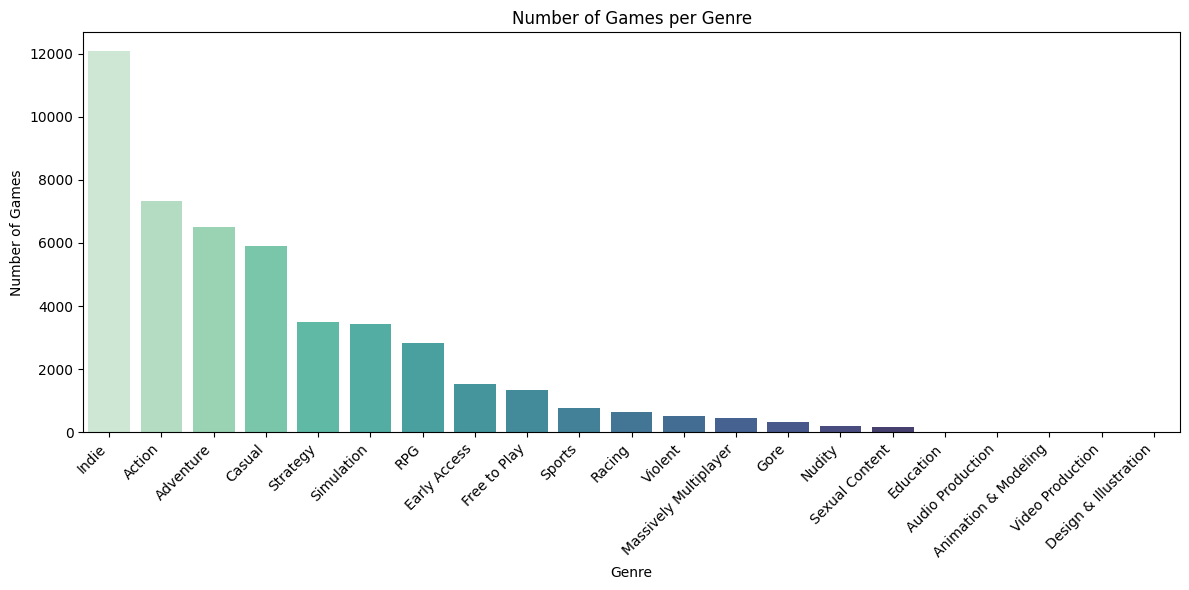

In [8]:
# Split genres and explode
game_genres = steam_data.assign(genres=steam_data['genres'].dropna().str.split(';')).explode('genres')

# Count games per genre
genre_counts = game_genres['genres'].value_counts()

# Barplot
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='mako_r', hue=genre_counts.index)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Games per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()

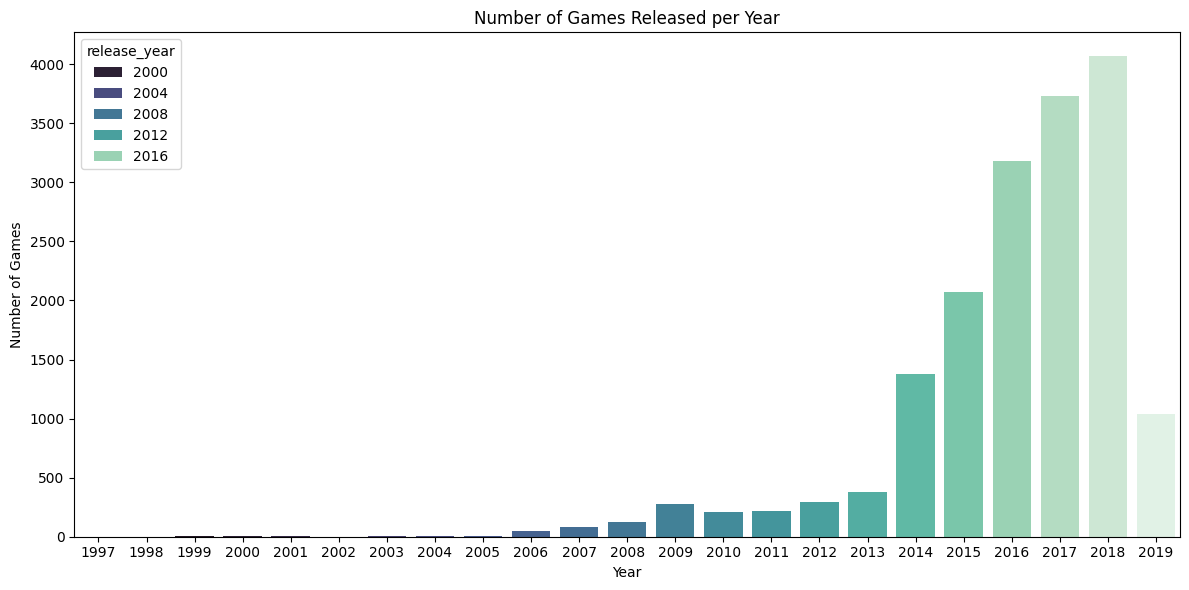

In [9]:
steam_data['release_year'] = pd.to_datetime(steam_data['release_date'], errors='coerce').dt.year

# Count games per year
year_counts = steam_data['release_year'].dropna().value_counts().sort_index()

# Barplot
plt.figure(figsize=(12,6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='mako', hue=year_counts.index)
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()

In [ ]:
# Ya tienes la columna 'price' como float, así que puedes usarla directamente

# Ajuste de conversión INR -> USD
conversion_rate = 83  # 1 USD = 83 INR
steam_data['price_usd'] = steam_data['price'] / conversion_rate

# Extraer el año de lanzamiento si no existe
if 'release_year' not in steam_data.columns:
    steam_data['release_year'] = pd.to_datetime(steam_data['release_date'], errors='coerce').dt.year

plt.figure(figsize=(14, 6))
sns.boxplot(x=steam_data['release_year'], y=steam_data['price_usd'])
plt.title('Distribución de precios de juegos por año de lanzamiento (USD)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

AttributeError: Can only use .str accessor with string values!

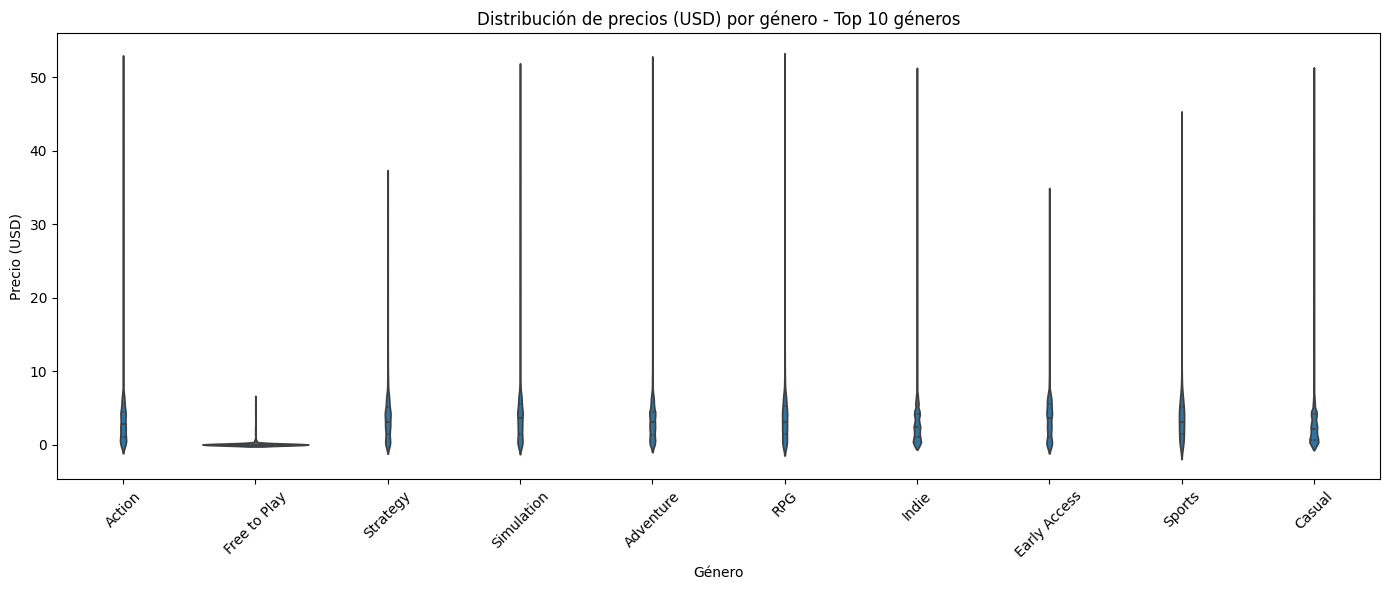

In [ ]:
df_genres = steam_data.assign(genres=steam_data['genres'].str.split(';')).explode('genres')
top_genres = df_genres['genres'].value_counts().index[:10]
df_top_genres = df_genres[df_genres['genres'].isin(top_genres)]

plt.figure(figsize=(14, 6))
sns.violinplot(x='genres', y='price_usd', data=df_top_genres, inner='quartile')
plt.title('Distribución de precios (USD) por género - Top 10 géneros')
plt.xlabel('Género')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()